First 5 records:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Statistical Summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.00000

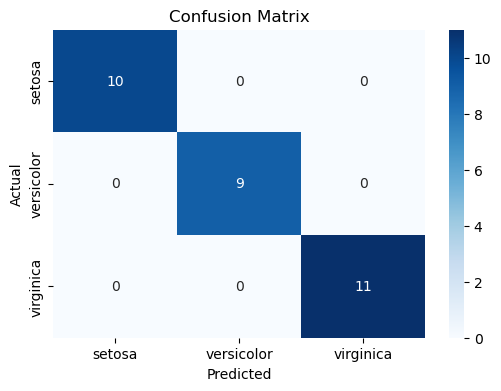

Sample Input: [[5.1, 3.5, 1.4, 0.2]]
Predicted Iris Species: setosa


C:\Users\praveen kumar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [1]:
# ==========================================
# IRIS FLOWER CLASSIFICATION (ALL-IN-ONE)
# RUNS DIRECTLY IN JUPYTER NOTEBOOK
# ==========================================

# STEP 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# STEP 2: Load Iris Dataset (Built-in, NO ERRORS)
iris = load_iris()

df = pd.DataFrame(
    iris.data,
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


# STEP 3: Display first 5 records
print("First 5 records:")
print(df.head())


# STEP 4: Dataset overview
print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
print(df.describe())


# STEP 5: Features and target
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']


# STEP 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# STEP 7: Train the model (Logistic Regression)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


# STEP 8: Predictions
y_pred = model.predict(X_test)


# STEP 9: Model Evaluation
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# STEP 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# STEP 11: Sample Prediction
sample = [[5.1, 3.5, 1.4, 0.2]]
prediction = model.predict(sample)

print("Sample Input:", sample)
print("Predicted Iris Species:", prediction[0])
